## **Importing Libraries:**

In [1]:
#Basic Libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Utiliteis:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

#Classification Models:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#Supress Warnings:
import warnings
warnings.filterwarnings('ignore')

#### **Reading training and testing datasets:**

In [2]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
train_df = train_df.set_index("ID")
test_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv')

train_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


#### Split training dataframe into into training and validation sets:

In [3]:
selected_features = train_df.iloc[:,0:16].columns

X_train, X_val, y_train, y_val = train_test_split(train_df[selected_features],
                                                  train_df["y"],
                                                  test_size = 0.2,
                                                  stratify = train_df["y"],
                                                  random_state=0)

X_test = test_df[selected_features]

X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
451,43114,823.478,336.202206,165.314818,2.033709,0.870758,43778,234.295646,0.600482,0.984833,0.798958,0.696889,0.007798,0.001135,0.485654,0.987680
2169,36774,704.528,260.416281,180.472203,1.442972,0.720924,37134,216.384175,0.801666,0.990305,0.931010,0.830916,0.007082,0.002082,0.690422,0.996260
1788,73118,1060.231,410.436491,227.469500,1.804358,0.832374,74002,305.117566,0.805974,0.988054,0.817397,0.743398,0.005613,0.001058,0.552640,0.997161
9676,68234,988.005,383.972464,228.175213,1.682797,0.804281,69335,294.751127,0.788103,0.984121,0.878400,0.767636,0.005627,0.001205,0.589265,0.991613
5694,44608,859.481,329.855779,175.167302,1.883090,0.847345,45446,238.320519,0.851948,0.981561,0.758840,0.722499,0.007395,0.001243,0.522005,0.982982


#### Preprocessing:

In [4]:
#Scaling the data:
sc = StandardScaler()
sc.fit(X_train)


for df in [X_train, X_val, X_test]:
    df[selected_features] = sc.transform(df[selected_features])

# X_train = pd.DataFrame(sc.transform(X_train))
# X_val = pd.DataFrame(sc.transform(X_val))
# X_test = pd.DataFrame(sc.transform(X_test))


In [5]:
X_train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03,8.667000e+03
mean,6.722569e-17,7.205497e-16,-9.419026e-16,2.297225e-16,-4.636369e-16,-3.277765e-16,-8.401290e-17,4.713228e-16,2.233288e-16,4.296744e-15,-9.930136e-16,1.770311e-17,-9.389067e-16,1.357580e-16,5.277370e-16,-1.397609e-14
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.108069e+00,-1.538024e+00,-1.587567e+00,-1.616503e+00,-2.206895e+00,-5.127222e+00,-1.106403e+00,-1.547202e+00,-3.990392e+00,-1.469918e+01,-6.505081e+00,-2.526516e+00,-3.283603e+00,-1.945053e+00,-2.313505e+00,-1.098337e+01
25%,-5.666148e-01,-7.026042e-01,-7.717522e-01,-5.903499e-01,-6.118292e-01,-3.806279e-01,-5.695793e-01,-6.381237e-01,-6.424308e-01,-3.346045e-01,-6.739267e-01,-6.035081e-01,-5.956682e-01,-9.352204e-01,-6.259941e-01,-3.261965e-01
50%,-2.878137e-01,-2.861976e-01,-2.769855e-01,-2.178710e-01,-1.233667e-01,1.518021e-01,-2.898717e-01,-2.495069e-01,2.091006e-01,2.440877e-01,1.590863e-01,1.628143e-02,7.077850e-02,-2.848429e-02,-2.193566e-02,2.998556e-01
75%,2.810807e-01,5.660581e-01,6.538861e-01,3.297904e-01,4.979069e-01,6.428685e-01,2.835731e-01,4.450354e-01,7.525937e-01,6.167425e-01,7.295997e-01,5.569384e-01,6.314613e-01,7.576413e-01,5.289523e-01,6.582498e-01
max,6.737283e+00,4.974245e+00,4.869954e+00,5.523757e+00,3.302596e+00,1.720043e+00,6.811125e+00,5.272394e+00,2.372660e+00,1.625571e+00,1.977944e+00,2.924640e+00,2.954444e+00,3.128542e+00,3.204365e+00,1.081323e+00


#### Model Testing:

In [6]:
#Estimate model performance:
def estimate_model(model, X_train, y_train, X_val, y_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    print(f"  Training set Accuracy   = {model.score(X_train, y_train):.4%}\n  Validation set Accuracy = {model.score(X_val, y_val):.4%}\n")
    print("  Validation set Classification Report:")
    print(classification_report(y_val, y_pred_val, digits=4))
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].set_title("Training Set Confusion Matrix")
    plot_confusion_matrix(model, X_train, y_train, ax=ax[0], 
                          cmap="cividis", xticks_rotation="vertical")
    
    ax[1].set_title("Validation Set Confusion Matrix")
    plot_confusion_matrix(model, X_val, y_val, ax=ax[1],
                          cmap="cividis", xticks_rotation="vertical")
    
    
#View the most predictive features from any tree-based model:
def feature_importance(model):
    importance = pd.DataFrame(model.feature_importances_, index= X_train.columns).sort_values(0)
    importance.plot(kind='barh', title="Feature Importance"), plt.show()

#### 1. Support Vector Machine:

Support Vector Classifier:
  Training set Accuracy   = 93.6310%
  Validation set Accuracy = 93.2626%

  Validation set Classification Report:
              precision    recall  f1-score   support

    BARBUNYA     0.9353    0.8910    0.9126       211
      BOMBAY     1.0000    1.0000    1.0000        84
        CALI     0.9323    0.9502    0.9412       261
    DERMASON     0.9262    0.9295    0.9278       567
       HOROZ     0.9795    0.9597    0.9695       298
       SEKER     0.9715    0.9475    0.9594       324
        SIRA     0.8679    0.9028    0.8850       422

    accuracy                         0.9326      2167
   macro avg     0.9447    0.9401    0.9422      2167
weighted avg     0.9334    0.9326    0.9329      2167



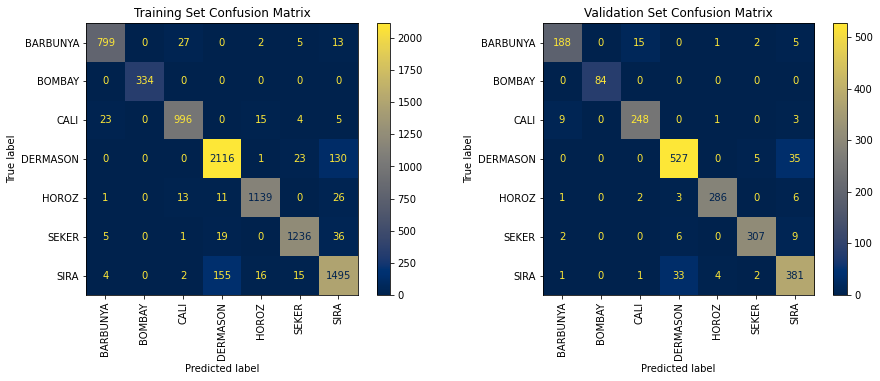

In [7]:
print("\033[1mSupport Vector Classifier:\033[0m")
model = SVC(C=11,
            kernel="rbf",
            gamma="scale",
            break_ties=True,
#             class_weight='balanced',
            random_state=0)


model.fit(X_train, y_train)
estimate_model(model, X_train, y_train, X_val, y_val)

#### 2. K-Nearest Neighbour:

In [8]:
# print("\033[1mK-Nearest Neighbour Classifier:\033[0m")
# model = KNeighborsClassifier(n_neighbors=50,
#                              p=3,
#                              weights="distance",
#                              metric="minkowski",
#                              n_jobs=-1)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)

#### 3. Decision Tree Classifier:

In [9]:
# print("\033[1mDecision Tree Classifier:\033[0m")
# model = DecisionTreeClassifier(criterion="entropy",
#                                splitter="best",
#                                max_depth=6,
#                                min_samples_split=5,
#                                random_state=0)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)

#### 4. Random Forest Classifier:

In [10]:
# print("\033[1mRandom Forest Classifier:\033[0m")
# model = RandomForestClassifier(n_estimators=1000,
#                                criterion="entropy",
#                                max_depth=6,
#                                min_samples_split=10,
#                                bootstrap=True,
#                                max_samples=0.8,
#                                oob_score=True,
#                                n_jobs=-1,
#                                random_state=0)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)
# feature_importance(model)

#### 4. Voting Classifier:

In [11]:
# print("\033[1mVoting Classifier:\033[0m")
# svc = SVC(C=1,
#           kernel="rbf",
#           gamma="scale",
#           probability=True,
#           break_ties=True,
#           random_state=0)
# knn = KNeighborsClassifier(n_neighbors=50,
#                            p=3,
#                            weights="distance",
#                            n_jobs=-1)
# rf = RandomForestClassifier(n_estimators=1000,
#                             criterion="entropy",
#                             max_depth=6,
#                             min_samples_split=10,
#                             bootstrap=True,
#                             max_samples=0.8,
#                             oob_score=True,
#                             n_jobs=-1,
#                             random_state=0)

# model = VotingClassifier([("SVC", svc),("KNN",knn),("RF",rf)],
#                          voting="soft",
#                          n_jobs=-1)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)

#### 5.XGB Classifier:

In [12]:
# print("\033[1mXGB Classifier:\033[0m")
# model = XGBClassifier(n_estimators=125, 
#                       max_depth=10, 
#                       learning_rate=0.82,
#                       gamma=0.1,
#                       subsample=0.8,
#                       reg_alpha=0.01,
#                       reg_lambda=0.1,
#                       booster="gbtree",
#                       n_jobs=-1,
#                       random_state=0,
#                       verbosity=0)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)
# feature_importance(model)

#### 6. CatBoost Classifier:

In [13]:
# print("\033[1mCatBoost Classifier:\033[0m")
# model = CatBoostClassifier(loss_function="MultiClassOneVsAll",
#                            n_estimators=105,
#                            depth=5,
#                            learning_rate=0.2,
#                            random_strength=10,
#                            min_data_in_leaf=3,
#                            l2_leaf_reg=3.5,
#                            grow_policy="SymmetricTree",
#                            bootstrap_type="Bayesian",
#                            bagging_temperature=2,
#                            sampling_frequency="PerTreeLevel",
#                            boosting_type="Ordered",
#                            verbose=0,
#                            random_seed=0)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)
# feature_importance(model)

#### 7. Stacking Classifier

In [14]:
# print("\033[1mStacking Classifier:\033[0m")
# svc = SVC(C=1,
#           kernel="rbf",
#           gamma="scale",
#           probability=True,
#           break_ties=True,
#           random_state=0)
# knn = KNeighborsClassifier(n_neighbors=50,
#                            p=3,
#                            weights="distance",
#                            n_jobs=-1)
# rf = RandomForestClassifier(n_estimators=1000,
#                             criterion="entropy",
#                             max_depth=6,
#                             min_samples_split=10,
#                             bootstrap=True,
#                             max_samples=0.8,
#                             oob_score=True,
#                             n_jobs=-1,
#                             random_state=0)
# cb = CatBoostClassifier(loss_function="MultiClassOneVsAll",
#                            n_estimators=105,
#                            depth=5,
#                            learning_rate=0.2,
#                            random_strength=10,
#                            min_data_in_leaf=3,
#                            l2_leaf_reg=3.5,
#                            grow_policy="SymmetricTree",
#                            bootstrap_type="Bayesian",
#                            bagging_temperature=2,
#                            sampling_frequency="PerTreeLevel",
#                            boosting_type="Ordered",
#                            verbose=0,
#                            random_seed=0)


# model = StackingClassifier([("SVC", svc),("KNN",knn),("CB",cb)],
#                            final_estimator=rf,
#                            n_jobs=-1)

# model.fit(X_train, y_train)
# estimate_model(model, X_train, y_train, X_val, y_val)

#### **Insights:**
##### - We can notice that all models make the same mistakes.
##### - The mistakes occurs almost with the same frequency in both the train and validation sets, which indicates a problem in the data itself.
##### - The most common problem is the confusion between Dermason and Sira.
##### - Lets perform some error analysis on 1 model to see where the problem is.

In [15]:
# #Support vector machine model:
# model = SVC(C=11,
#             kernel="rbf",
#             gamma="scale",
#             break_ties=True,
#             random_state=0)
# model.fit(X_train, y_train)

In [16]:
# train_df.loc[X_val.index, "y_hat"] = model.predict(X_val)
# train_df.loc[X_train.index, "y_hat"] = model.predict(X_train)
# mislabeled = train_df[train_df["y"] != train_df["y_hat"]]

In [17]:
# #Dermason that is mislabeled as Sira
# derm_FN = mislabeled[(mislabeled["y"] == "DERMASON") & (mislabeled["y_hat"] == "SIRA")]
# #correctly labeled Sira:
# sira_TP = train_df[(train_df["y"] == "SIRA") & (train_df["y_hat"] == "SIRA")]

In [18]:
# x = "Area"
# y=""
# plt.scat

#### Test Data:

In [19]:
X_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.156597,0.469163,0.789784,-0.126690,1.597629,1.214920,0.214762,0.302094,-2.650247,-6.316095,-1.356408,-1.655270,0.144302,-1.228785,-1.583939,-7.459351
1,-0.824428,-1.046463,-1.047372,-0.949179,-0.574812,-0.334195,-0.824037,-1.038876,0.351731,0.139747,0.610474,0.522216,1.268140,1.091397,0.492902,0.669484
2,0.055326,0.262095,-0.129030,0.534849,-0.888781,-0.768616,0.069951,0.182419,0.056065,-1.798259,-0.778679,0.882580,-0.809232,0.232868,0.871527,0.125017
3,-0.958404,-1.289180,-1.231336,-1.211841,-0.540608,-0.292297,-0.958013,-1.268216,-0.691109,0.244634,0.999155,0.487330,1.829680,1.363544,0.456775,0.817968
4,3.015791,2.695070,2.387047,3.212582,-0.279579,-0.001240,3.007055,2.898581,1.112302,0.021013,-0.095054,0.153474,-2.535142,-1.242720,0.115740,-0.756797


In [20]:
test_df["y"] = model.predict(X_test)
submission = test_df[["ID", "y"]]
submission

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [21]:
submission.to_csv('/kaggle/working/submission.csv', index=False)